In [14]:
from fastai.vision.all import *

In [15]:
path = Path("C:\\Users\\MONSTER\\Desktop\\fruits")
train_path = path/"train"
valid_path = path/"validation"

In [16]:
fru_veg = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2.0)
)

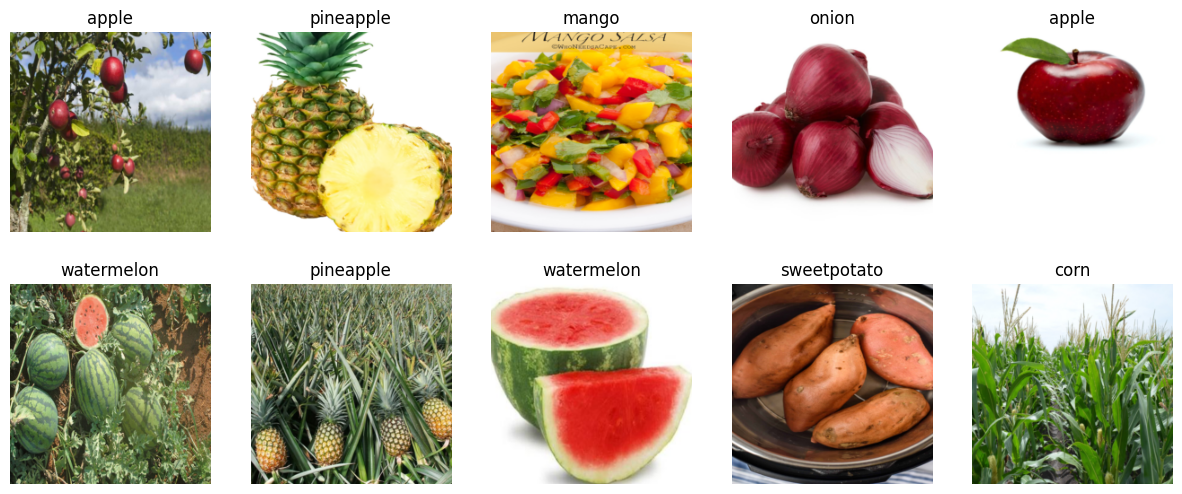

In [17]:
dls = fru_veg.dataloaders(train_path, valid_path)
dls.valid.show_batch(max_n=10, nrows=2)

In [18]:
dls = fru_veg.dataloaders(train_path, valid_path)
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.230406,0.742729,0.214552,01:12


epoch,train_loss,valid_loss,error_rate,time
0,1.055246,0.525150,0.152985,01:17
1,0.824106,0.434164,0.134328,01:15
2,0.598434,0.384332,0.115672,01:18
3,0.473159,0.376320,0.110075,01:19


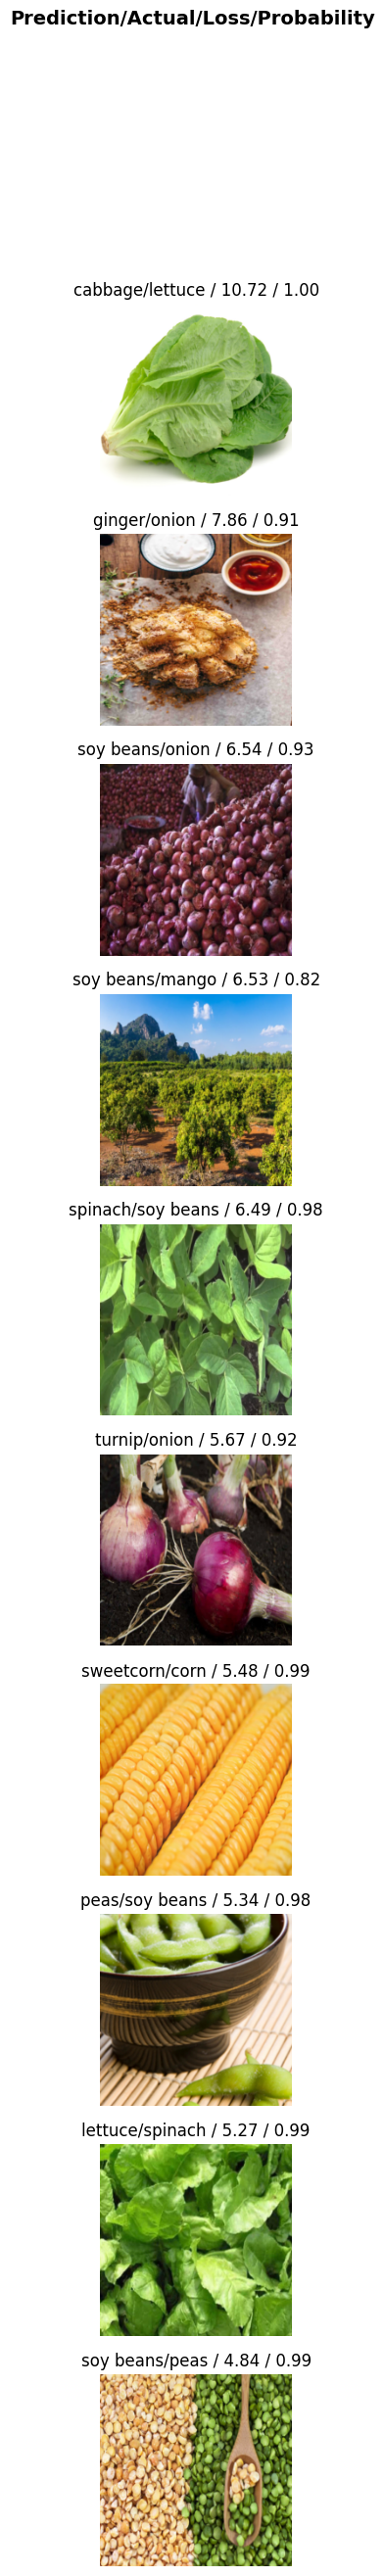

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(10, nrows=10)